In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
# two seperate data sets of white and red wine
dfRed = pd.read_csv("winequality-red.csv", sep = ';')
dfWhite = pd.read_csv("winequality-white.csv", sep = ';')

In [39]:
# adding a column for type of red or white
dfRed['type'] = 0
dfWhite ['type'] = 1

In [43]:
# merging two data frames
df = dfRed.append(dfWhite)

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [48]:
df.shape

(1599, 13)

In [68]:
df['quality'] =df['quality'].astype(float)
df['type'] =df['type'].astype(float)


In [69]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
type                    float64
dtype: object

In [50]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [51]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

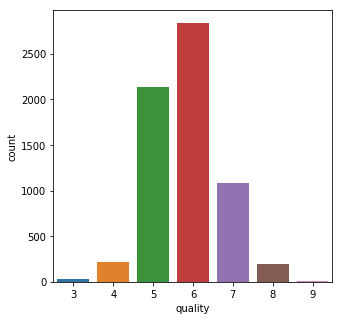

In [52]:
plt.figure(figsize = (5,5))
fig = sb.countplot(df['quality'])

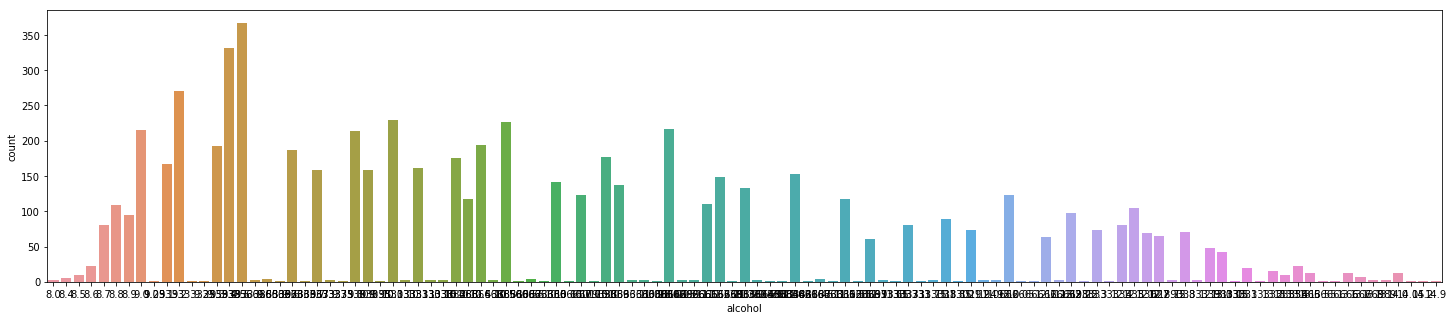

In [53]:
plt.figure(figsize = (25,5))
fig = sb.countplot(df['alcohol'])

In [70]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter
import scipy.stats as ss

In [71]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [72]:
# one category and one numeric. the order is important
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [59]:
#two categorical cariables. The order is important
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [73]:
relations = pd.DataFrame()
columns = df.columns[0:len(df.columns)]#columns labels
rows = df.columns[0:len(df.columns)] # rows
          
for j in range(0,len(columns)):
    for i in range(0,len(rows)):
        if (df[columns[j]].dtypes == 'float64'  and df[rows[i]].dtypes == 'float64'):
            u = df[columns[j]].corr( df[rows[i]])
            u = u*1
            relations.loc[rows[i],columns[j]] = u
        elif  (df[rows[i]].dtypes == 'O' and df[columns[j]].dtypes == 'float64'):
            u = correlation_ratio(df[rows[i]], df[columns[j]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
        elif (df[columns[j]].dtypes == 'O' and df[rows[i]].dtypes == 'float64' ):
            u = correlation_ratio(df[columns[j]], df[rows[i]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
        elif (df[columns[j]].dtypes == 'O' and df[rows[i]].dtypes == 'O'):
            u = theils_u(df[columns[j]], df[rows[i]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
relations.fillna(value=np.nan,inplace=True)

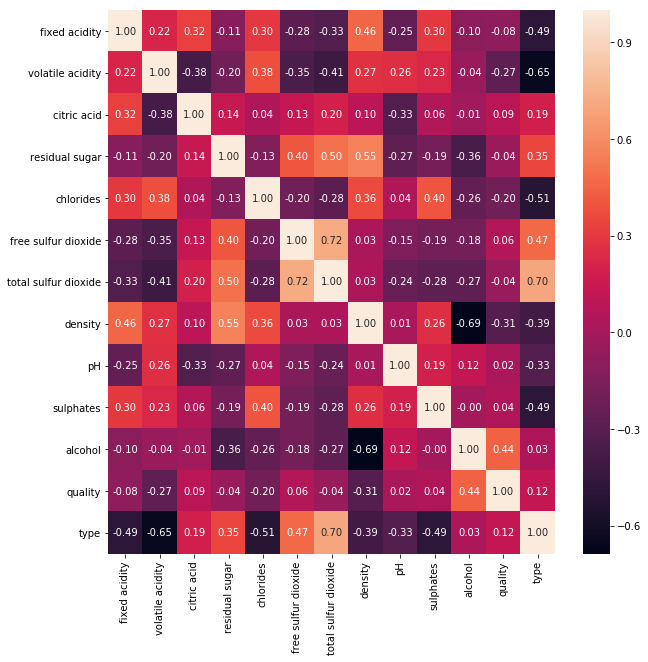

In [74]:
plt.figure(figsize=(10,10))
sb.heatmap(relations,annot=True,fmt='.2f')
plt.show()